# Análise Exploratória do Banco de Dados de Salários de Profissionais da Área de Dados

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Análise de nulos

In [54]:
df=pd.read_csv("D:\Desktop\ds_salaries.csv")

#Obtendo informações do dataset
print(df.describe(),'\n',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+0

### Não há nulos

## Separando os tipos de colunas

In [55]:
#Deletando a coluna salary, pois já tem uma que é salary_in_usd que padroniza as colunas
df=df.drop('salary',axis=1)

#Separando as colunas qualitativas e quantitativas
quali=df.select_dtypes(include='object').columns
quanti=df.select_dtypes(exclude='object').columns

## Análise das colunas categóricas

In [56]:
for i in quali:
    print('Coluna '+str(i))
    print(df[i].unique())


Coluna experience_level
['SE' 'MI' 'EN' 'EX']
Coluna employment_type
['FT' 'CT' 'FL' 'PT']
Coluna job_title
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scienti

## Análise de outliers

<AxesSubplot:>

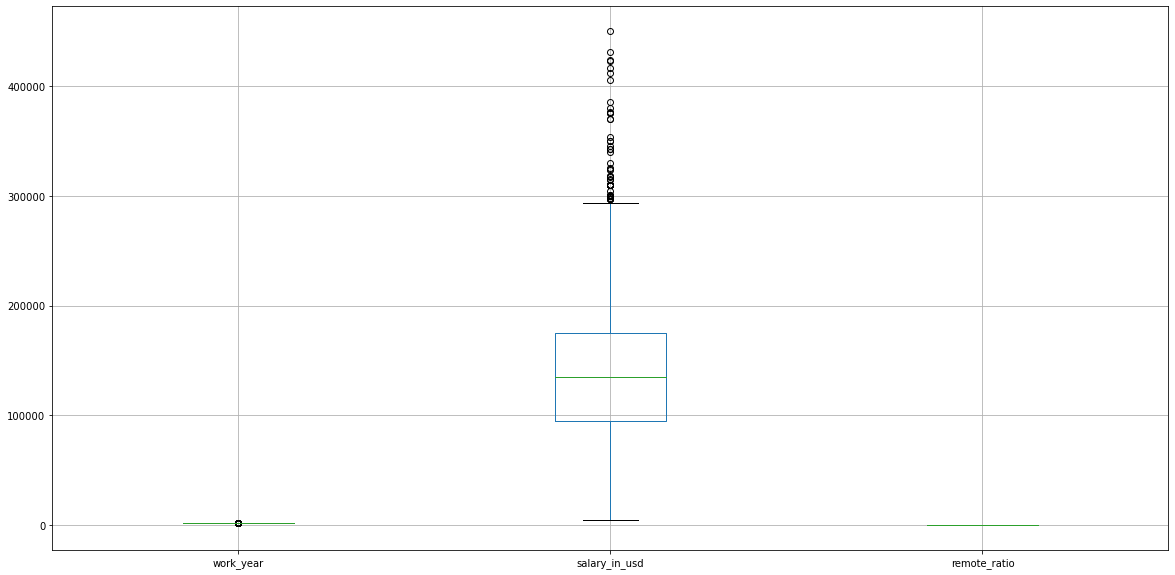

In [57]:
plt.figure(figsize=(20,10))
df.boxplot()

## Verificando outliers por nível de experiência

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

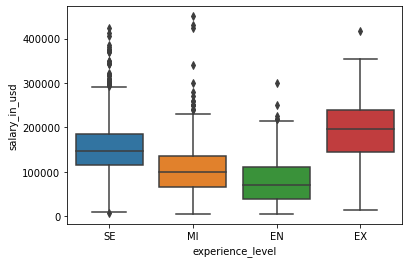

In [58]:
sns.boxplot(data=df,x='experience_level',y='salary_in_usd')

## Avaliando porcentagem de outliers

### Criando máscara para cada tipo de experience_level

In [59]:
experience_list = df['experience_level'].unique()

mask=[]
for experience in experience_list:
    mask.append(df['experience_level']==experience) 

### Calculando as porcentagens

In [60]:
for i in range(len(mask)):
    q3=df.salary_in_usd[mask[i]].quantile(0.75)
    q1=df.salary_in_usd[mask[i]].quantile(0.25)
    amp=q3-q1
    ls=df.salary_in_usd[mask[i]]>q3+amp*1.5
    li=df.salary_in_usd[mask[i]]<q1-amp*1.5
    outliers=ls.sum()+li.sum()
    porcentagem=outliers/df.salary_in_usd[mask[i]].count()
    print('Porcentagem de outliers de '+experience_list[i]+' é de: '+f"{porcentagem*100:.2f}"+'%')

Porcentagem de outliers de SE é de: 1.79%
Porcentagem de outliers de MI é de: 1.86%
Porcentagem de outliers de EN é de: 1.56%
Porcentagem de outliers de EX é de: 0.88%


#### Como a porcentagem de outliers é pequena, vamos tirar elas da nossa análise

## Tratando os outliers

In [61]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


In [62]:
index=[]
for i in range(len(mask)):  #Loop em salários para cada nível de experiência
    df_sal_per_experience=df.salary_in_usd[mask[i]]
    q3=df_sal_per_experience.quantile(0.75)
    q1=df_sal_per_experience.quantile(0.25)
    amp=q3-q1
    ls=df_sal_per_experience>q3+amp*1.5
    li=df_sal_per_experience<q1-amp*1.5
    #Adicionando as colunas que não são outlier de cada nível de experiência na lista index
    for i in df_sal_per_experience[~(li|ls)].index.to_list():
        index.append(i)
#Selecionando apenas os índices que não são outlier
df=df.iloc[index,:]

In [63]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...
3558,2021,EX,FT,BI Data Analyst,USD,150000,IN,100,US,L
3559,2020,EX,FT,Data Engineer,EUR,79833,ES,50,ES,L
3643,2021,EX,FT,Director of Data Science,EUR,141846,DE,0,DE,L
3660,2021,EX,FT,Data Science Consultant,EUR,69741,FR,100,ES,S


### Fazendo boxplot novamente

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

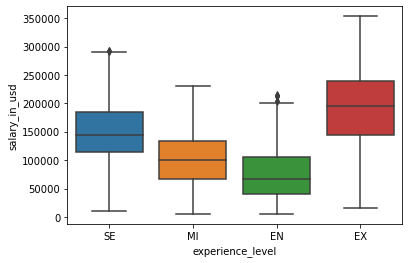

In [64]:
sns.boxplot(data=df,x='experience_level',y='salary_in_usd')

## Análise exploratória dos dados

(array([7.700e+01, 8.700e+01, 2.978e+03, 5.600e+01, 1.710e+02, 2.000e+00,
        3.400e+01, 3.000e+00, 4.000e+00, 7.000e+00, 4.000e+00, 1.400e+01,
        1.400e+01, 1.000e+01, 5.700e+01, 3.000e+00, 1.300e+01, 2.000e+00,
        4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 1.500e+01, 4.000e+00, 4.000e+00,
        6.000e+00, 5.000e+00, 1.000e+00, 1.400e+01, 6.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0.        ,  0.98611111,  1.97222222,  2.95833333,  3.94444444,
         4.93055556,  5.91666667,  6.

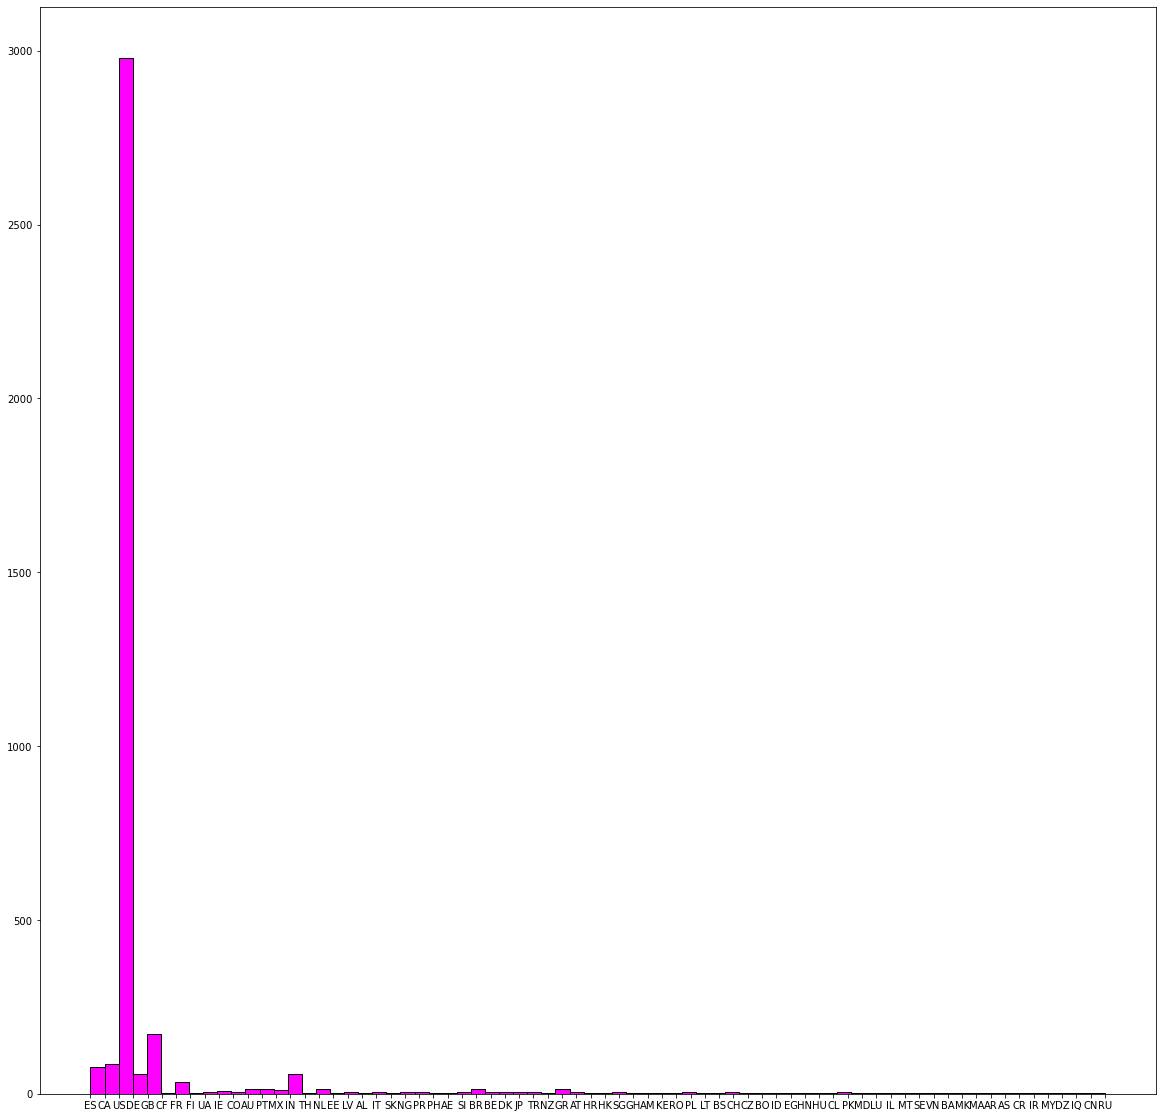

In [65]:
plt.figure(figsize=(20,20))
plt.hist(df.company_location,bins=len(df.company_location.unique()),edgecolor='black',color='fuchsia')

#### Temos muitos dados de cientista de dados do Estados Unidos

(array([  73.,    0.,    0.,  226.,    0.,    0., 1644.,    0.,    0.,
        1746.]),
 array([2020. , 2020.3, 2020.6, 2020.9, 2021.2, 2021.5, 2021.8, 2022.1,
        2022.4, 2022.7, 2023. ]),
 <BarContainer object of 10 artists>)

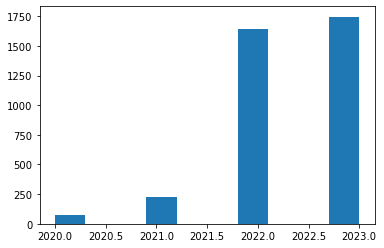

In [66]:
plt.hist(df.work_year)

#### Número de profissionais de Data Science cresceu muito de 2021 para 2022 

### Análise das Correlações

<AxesSubplot:>

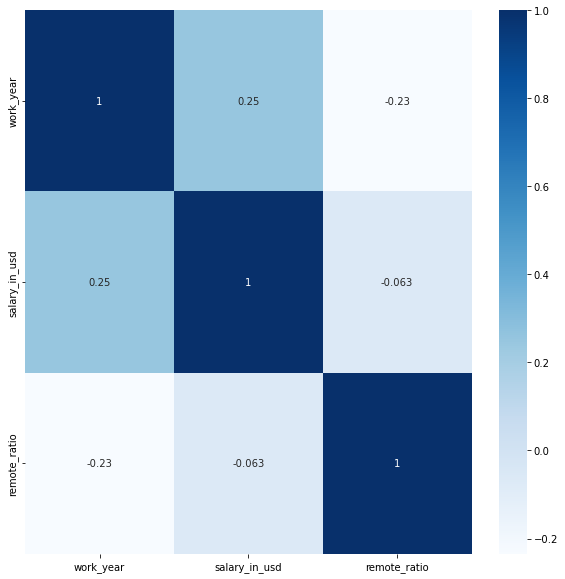

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

#### As variáveis quantitativas não tem muita correlação entre si, então modelo de Naive Bayes talvez possa performar bem

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

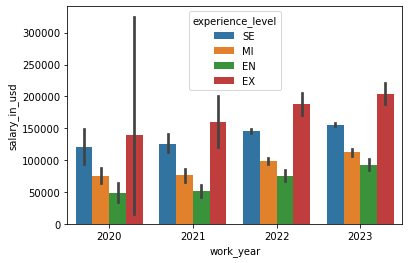

In [68]:
sns.barplot(data=df,x='work_year',y='salary_in_usd', hue='experience_level')

#### O salário aumentou ao longo dos anos para todos os níveis de experiência, além disso o nível de experiência afeta na média salarial

<AxesSubplot:xlabel='salary_in_usd', ylabel='employment_type'>

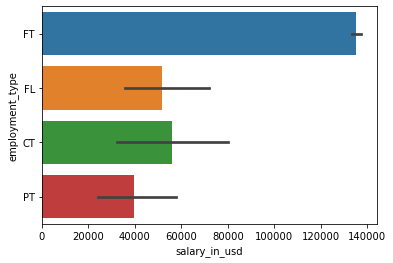

In [69]:
sns.barplot(data=df,x='salary_in_usd',y='employment_type')

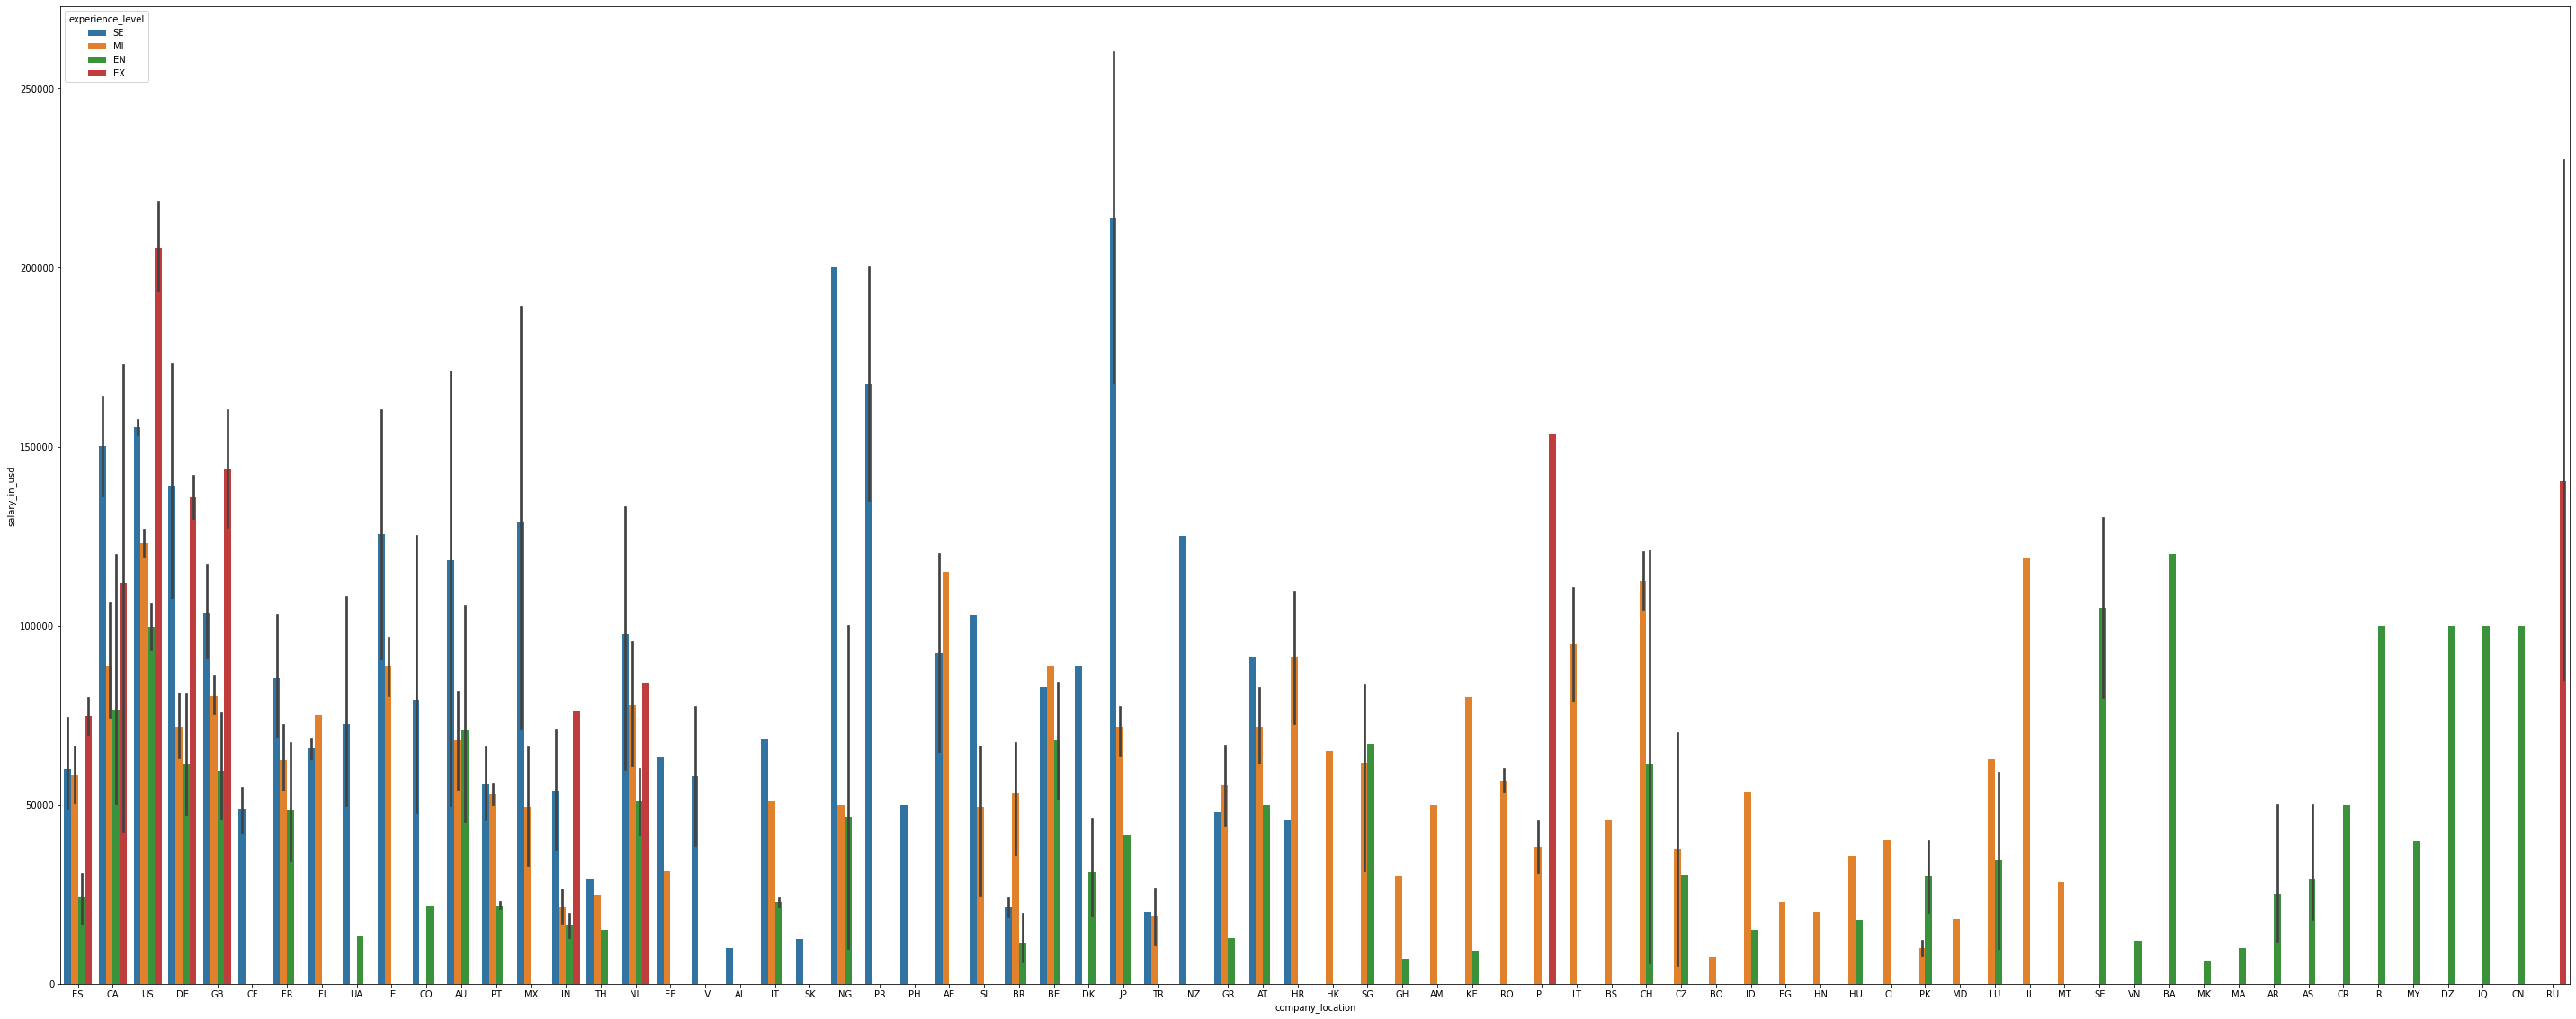

In [70]:
plt.figure(figsize=(50,20))
sns.barplot(data=df,y='salary_in_usd',x='company_location',hue='experience_level')
plt.savefig(r'D:\Desktop\Data Science\Python para Data Science e Analytics\grafico.jpeg')

#### O local da empresa influencia no salário médio de cada nível de experiência

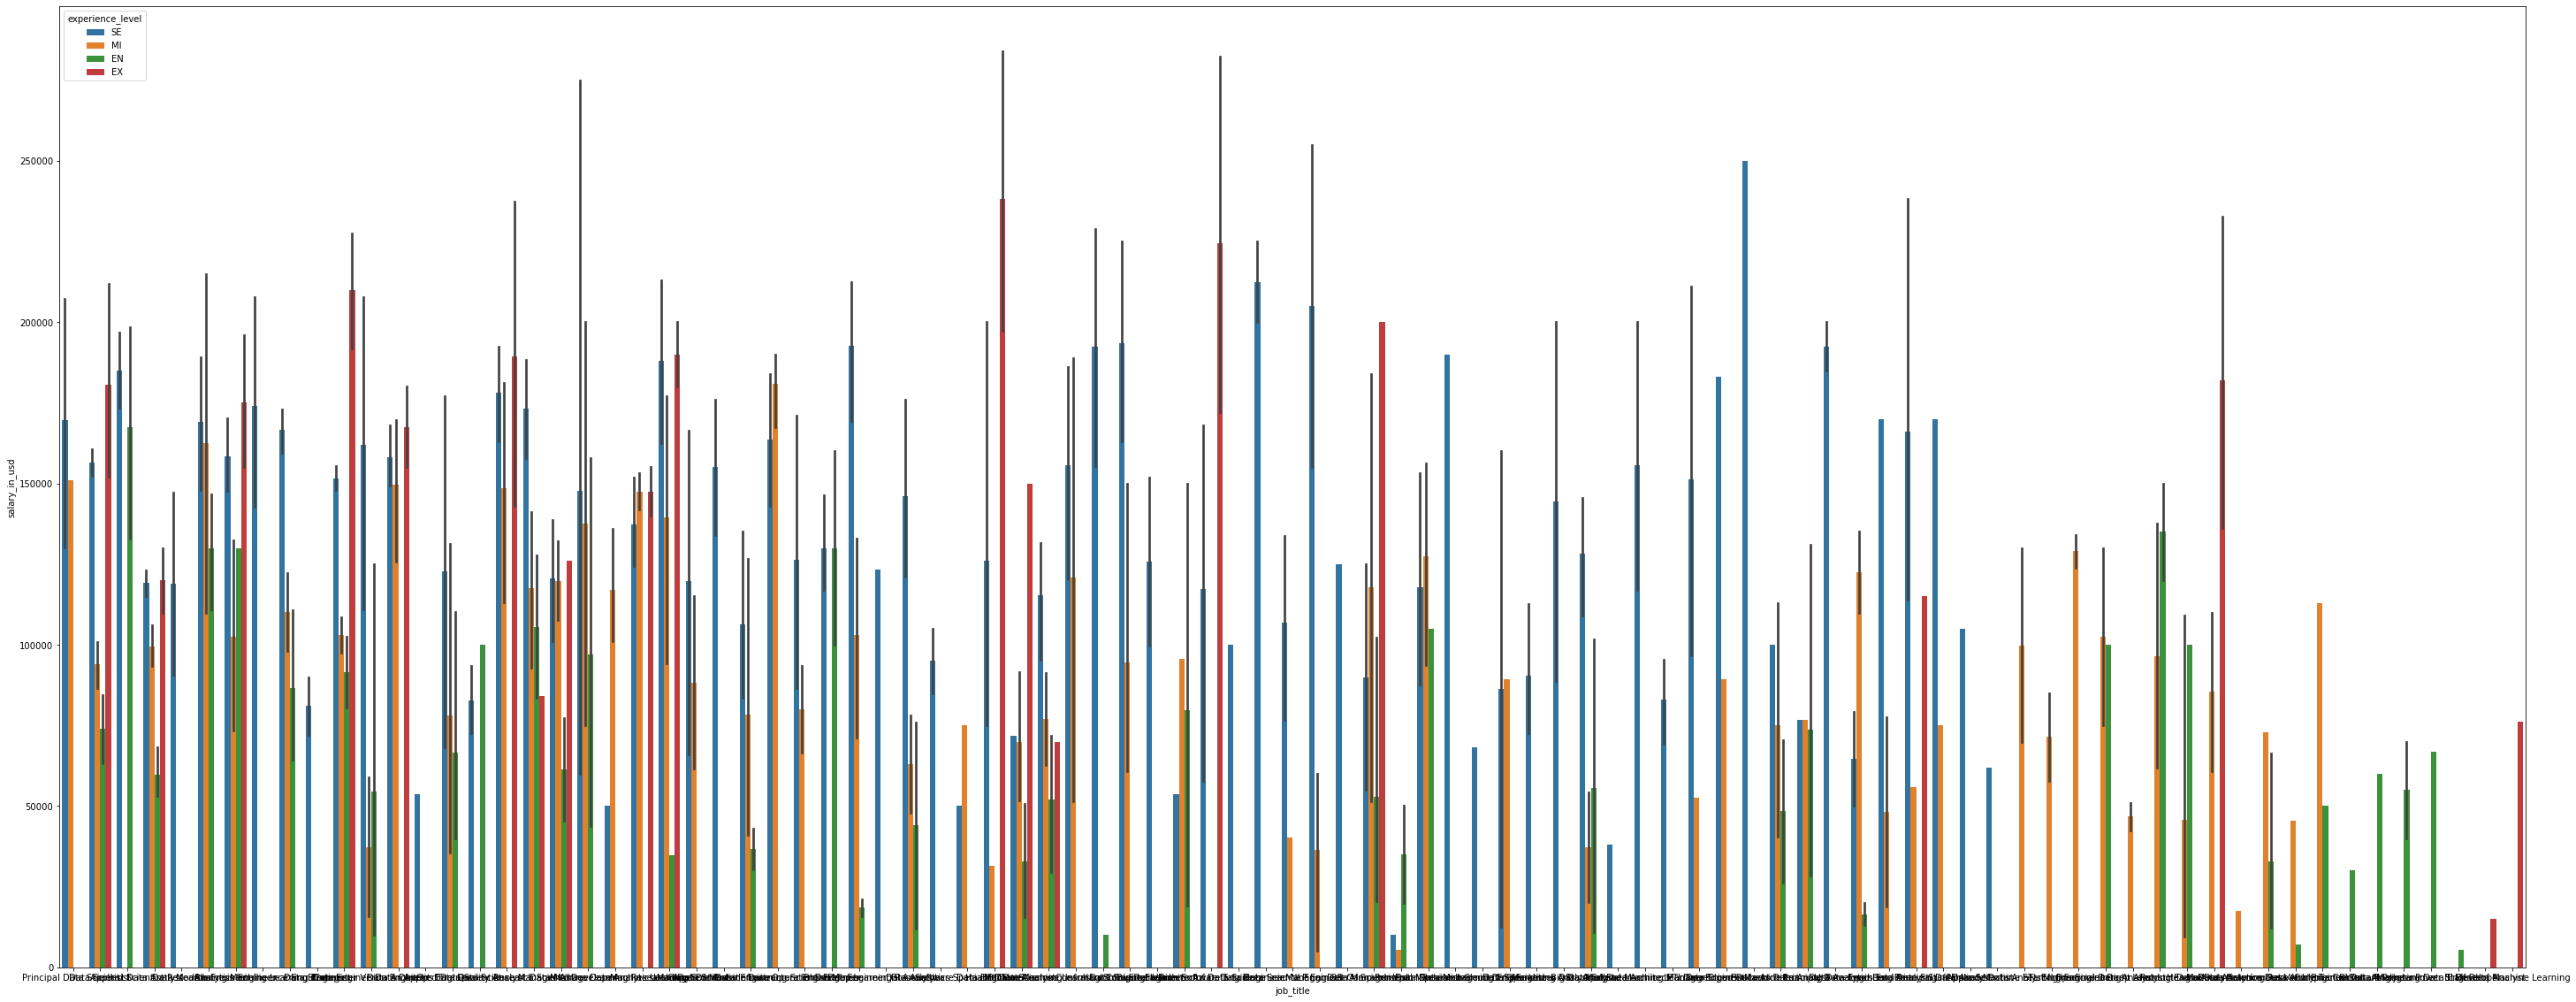

In [71]:
plt.figure(figsize=(50,20))
sns.barplot(data=df,y='salary_in_usd',x='job_title',hue='experience_level')
plt.savefig(r'D:\Desktop\Data Science\Python para Data Science e Analytics\grafico.jpeg')

#### employment type influencia no salário médio, logo pode ser considerada variável categórica ordinal

In [72]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### Remote ratio é bem distribuído em relação ás outras variáveis

## Tratamento de variáveis categóricas

In [73]:
df_experience={'experience_level':['EN','MI','SE','EX'],'experience_level_encoded':[1,2,3,4]}
df_experience=pd.DataFrame(df_experience)

In [74]:
df_experience

,experience_level,experience_level_encoded
0,EN,1
1,MI,2
2,SE,3
3,EX,4


In [75]:
df=pd.merge(df,df_experience,on='experience_level')
df
df=df.drop('experience_level',axis=1)

In [76]:
#Gerando colunas qualitativas das colunas quantitativas
quali=quali.drop('experience_level')
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for coluna in quali:
    df[str(coluna)+'_encoded']=encoder.fit_transform(df[coluna])


In [77]:
#Deletando as colunas categóricas originais
df=df.drop(quali.to_list(), axis=1)

## Padronização das variáveis de entrada

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.drop('salary_in_usd',axis=1)
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=df['salary_in_usd']

## Quebrando o Dataframe em treino e teste

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

## Modelagem estatística

### 1. Regressão Linear

In [80]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [82]:
from sklearn.metrics import r2_score
print('R-quadrado para os dados de treino')
print(r2_score(y_train,y_pred_train))
print('R-quadrado para os dados de teste')
print(r2_score(y_test,y_pred))

R-quadrado para os dados de treino
0.39015021820520357
R-quadrado para os dados de teste
0.3631288427187971


#### O modelo não performou bem nem para os dados de treino e nem para os dados de teste

## 